## Multiple Linear Regression Exercise

#### Enter your name below as shown in the class register.

#### Name: *Chan Tai Man*

### In this exercise, you can replace the aliases/abbreviations and variable names as you see fit. You should add appropriate comments to help you and the reader to understand the program.

References:<br>
 <ul>
     <li>Ch6 of Lee (2019)</li>
     <li>Agarwal (2018) at https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155</li>
</ul>

In [1]:
# You must download the dataset from the course web page.

# Import the necessary packages and give them aliases
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a dataframe variable called df by calling the read_csv() function of the pandas package
df = pd.read_csv('California Housing.csv')

print(df.shape)

df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  int64  
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int64  
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [3]:
print(df.max())

print()

df_new = df.isnull()
print(df_new)

MedInc           15.000100
HouseAge         52.000000
AveRooms        141.909091
AveBedrms        34.066667
Population    35682.000000
AveOccup       1243.333333
Latitude         41.950000
Longitude      -114.310000
MEDV              5.000010
dtype: float64

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     Fal

In [4]:
corr = df.corr()
print(corr)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MEDV        0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude      MEDV  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

<Axes: >

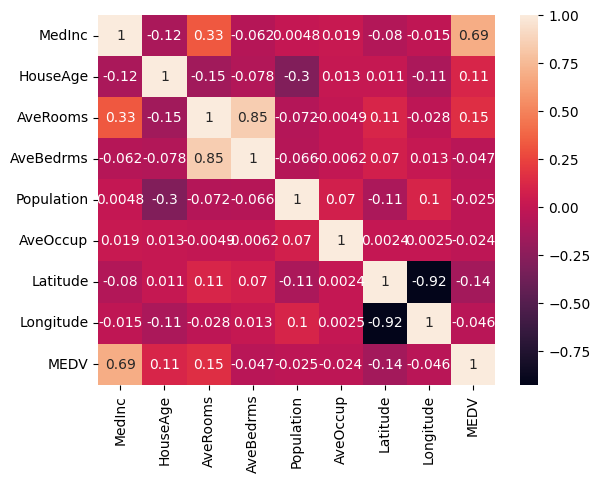

In [5]:
# Let's show the same dataframe in a hotter way - using a heatmap
import seaborn as sns

sns.heatmap(data=corr, annot=True)

In [6]:
print(df.corr().abs().nlargest(3, 'MEDV'))
print()
print(df.corr().abs().nlargest(3, 'MEDV').index)
print()
print(df.corr().abs().nlargest(3, 'MEDV').values[:, 8])

            MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MEDV      0.688075  0.105623  0.151948   0.046701    0.024650  0.023737   
MedInc    1.000000  0.119034  0.326895   0.062040    0.004834  0.018766   
AveRooms  0.326895  0.153277  1.000000   0.847621    0.072213  0.004852   

          Latitude  Longitude      MEDV  
MEDV      0.144160   0.045967  1.000000  
MedInc    0.079809   0.015176  0.688075  
AveRooms  0.106389   0.027540  0.151948  

Index(['MEDV', 'MedInc', 'AveRooms'], dtype='object')

[1.         0.68807521 0.15194829]


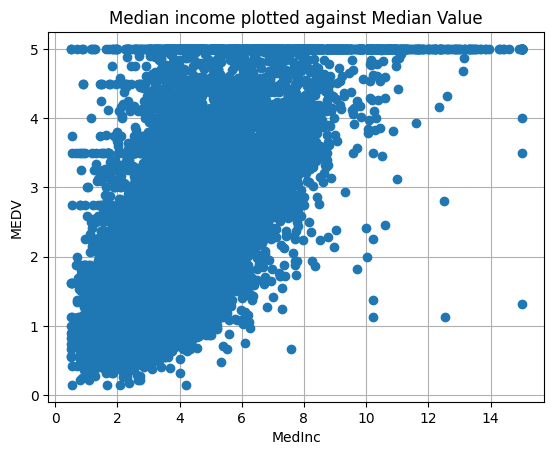

In [7]:
plt.title('Median income plotted against Median Value')
plt.xlabel('MedInc')
plt.ylabel('MEDV')
plt.plot(df['MedInc'], df['MEDV'], 'o')
plt.grid(True)

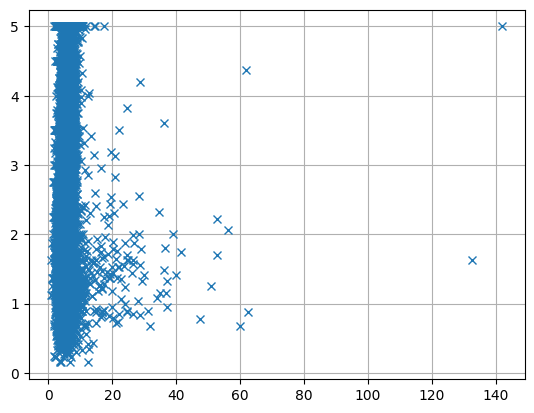

In [8]:
plt.plot(df['AveRooms'], df['MEDV'], 'x')
plt.grid(True)

In [9]:
X = pd.DataFrame(np.c_[df['AveRooms'], df['MedInc']], columns=['AveRooms', 'MedInc'])
print(X)
print()

y = df['MEDV']
print(y)

       AveRooms  MedInc
0      6.984127  8.3252
1      6.238137  8.3014
2      8.288136  7.2574
3      5.817352  5.6431
4      6.281853  3.8462
...         ...     ...
20635  5.045455  1.5603
20636  6.114035  2.5568
20637  5.205543  1.7000
20638  5.329513  1.8672
20639  5.254717  2.3886

[20640 rows x 2 columns]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MEDV, Length: 20640, dtype: float64


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [11]:
slr_MedInc = LinearRegression()
slr_MedInc.fit(X=x_train[['MedInc']], y=Y_train)
# Try calculating the score 
print('R-Squared: %.4f' % slr_MedInc.score(x_test[['MedInc']], Y_test))

slr_rooms = LinearRegression()
slr_rooms.fit(X=x_train[['AveRooms']], y=Y_train)
print('R-Squared: %.4f' % slr_rooms.score(x_test[['AveRooms']], Y_test))


# The End

R-Squared: 0.4849
R-Squared: 0.0248
